# Equal-Weight S&P 500 Index Fund

## Introduction & Library Imports

The S&P 500 is the world's most popular stock market index. The largest fund that is benchmarked to this index is the SPDR® S&P 500® ETF Trust. It has more than US$250 billion of assets under management.

The goal of this section of the course is to create a Python script that will accept the value of your portfolio and tell you how many shares of each S&P 500 constituent you should purchase to get an equal-weight version of the index fund.

## Library Imports

The first thing we need to do is import the open-source software libraries that we'll be using in this tutorial.

In [1]:
import numpy as np
import pandas as pd
import requests
import math

## Importing Our List of Stocks

The next thing we need to do is import the constituents of the S&P 500.

These constituents change over time, so in an ideal world you would connect directly to the index provider (Standard & Poor's) and pull their real-time constituents on a regular basis.

Paying for access to the index provider's API is outside of the scope of this course. 

There's a static version of the S&P 500 constituents available here. [Click this link to download them now](https://drive.google.com/file/d/1ZJSpbY69DVckVZlO9cC6KkgfSufybcHN/view?usp=sharing). Move this file into the `starter-files` folder so it can be accessed by other files in that directory.

Now it's time to import these stocks to our Jupyter Notebook file.

In [2]:
stocks = pd.read_csv('sp_500_stocks.csv')
stocks

,Ticker
0,A
1,AAL
2,AAP
3,AAPL
4,ABBV
...,...
500,YUM
501,ZBH
502,ZBRA
503,ZION


In [3]:
# Remoing some stocks 
stocks = stocks.drop([135, 219, 467, 484, 28])
stocks = stocks.reset_index()
stocks

,index,Ticker
0,0,A
1,1,AAL
2,2,AAP
3,3,AAPL
4,4,ABBV
...,...,...
495,500,YUM
496,501,ZBH
497,502,ZBRA
498,503,ZION


In [4]:
stocks.head(50)

,index,Ticker
0,0,A
1,1,AAL
2,2,AAP
3,3,AAPL
4,4,ABBV
5,5,ABC
6,6,ABMD
7,7,ABT
8,8,ACN
9,9,ADBE


In [ ]:
# for i in stocks['Ticker']:
#     ticker = yf.Ticker(i)
#     print(i, ticker.info['longName'])

# Let's look at yahoo finance
### What is yfinance?
yfinance is a popular open source library developed by Ran Aroussi as a means to access the financial data available on Yahoo Finance.
- Yahoo Finance offers an excellent range of market data on stocks, bonds, currencies and cryptocurrencies. It also offers market news, reports and analysis and additionally options and fundamentals data- setting it apart from some of it’s competitors.
- Yahoo Finance used to have their own official API, but this was decommissioned on May 15th 2017, following wide-spread misuse of data.
- These days a range of unofficial APIs and libraries exist to access the same data, including of course yfinance.


### Is the yfinance library free?
Yes, yfinance is completely open source and free. You can find the documentation here.


### Why should I use the yfinance library?
- Free
- Quick and easy to set yourself up
- Simple
- High granularity of data (1min/2min/5min data)
- Returns data directly in pandas dataframes/series

### Why shouldn’t I use the yfinance library?
- Lacks specialised features
- Some methods are fragile
- Unofficial / not necessarily maintained
- Can get yourself rate limited/blacklisted

# Let's get started
### The Ticker module
The ```Ticker``` module, which allows you to access ticker data in a more Pythonic way:

In [5]:
# this is how we import the library
import yfinance as yf

# This is how we initialise the ticker
msft = yf.Ticker("MSFT")

### get all stock info

In [7]:
# get all stock info
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'fax': '425 706 7329',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, Syst

In [3]:
# In dictionaries, we give the keys and get the values
msft.info['marketCap']

2367013781504

In [4]:
msft.info['averageVolume']

28810079

In [5]:
msft.info['heldPercentInstitutions']

0.73767

In [6]:
msft.info['totalDebt']

79312003072

In [7]:
msft.info['longName']

'Microsoft Corporation'

### The important part

In [109]:
stocks['Ticker']

0         A
1       AAL
2       AAP
3      AAPL
4      ABBV
       ... 
496     YUM
497     ZBH
498    ZBRA
499    ZION
500     ZTS
Name: Ticker, Length: 501, dtype: object

In [120]:
type(stocks['Ticker'])

pandas.core.series.Series

In [122]:
# for i in stocks['Ticker']:
#     ticker = yf.Ticker(i)
#     print(i, ticker.info['longName'])

In [8]:
tatamotors = yf.Ticker("TATAMOTORS.NS")

In [9]:
tatamotors.info

{'address1': 'Shivasagar Estate',
 'address2': 'A Block Dr. Annie Besant Road Worli',
 'city': 'Mumbai',
 'zip': '400018',
 'country': 'India',
 'phone': '91 22 6757 7200',
 'website': 'https://www.tatamotors.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'Tata Motors Limited designs, develops, manufactures, and sells various automotive vehicles. The company offers passenger cars; sports utility vehicles; intermediate and light commercial vehicles; small, medium, and heavy commercial vehicles; defense vehicles; pickups, wingers, buses, and trucks; and electric vehicles, as well as related spare parts and accessories. It also manufactures engines for industrial and marine applications; aggregates comprising axles and transmissions for commercial vehicles; and factory automation equipment, as well as provides information technology and vehicle financing services. The company offers its products under

### get historical market data

In [10]:
# get historical market data
# Options are ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
hist = msft.history(period="6mo")

In [11]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-21 00:00:00-05:00,240.301482,243.526343,240.062614,240.918594,26394700,0.00,0.0
2022-11-22 00:00:00-05:00,242.451387,244.163349,239.584860,243.884659,19665700,0.00,0.0
2022-11-23 00:00:00-05:00,243.964289,247.119470,243.128219,246.422745,19508500,0.00,0.0
2022-11-25 00:00:00-05:00,246.154009,247.537511,245.576718,246.333176,9200800,0.00,0.0
2022-11-28 00:00:00-05:00,244.929758,245.497086,239.674440,240.629944,24778200,0.00,0.0
...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,308.425773,309.224016,306.919057,308.784973,16336500,0.00,0.0
2023-05-16 00:00:00-04:00,309.154160,313.025702,309.154160,311.059998,26730300,0.00,0.0
2023-05-17 00:00:00-04:00,312.290009,314.429993,310.739990,314.000000,24315000,0.68,0.0


In [12]:
hist['Close']

Date
2022-11-21 00:00:00-05:00    240.918594
2022-11-22 00:00:00-05:00    243.884659
2022-11-23 00:00:00-05:00    246.422745
2022-11-25 00:00:00-05:00    246.333176
2022-11-28 00:00:00-05:00    240.629944
                                ...    
2023-05-15 00:00:00-04:00    308.784973
2023-05-16 00:00:00-04:00    311.059998
2023-05-17 00:00:00-04:00    314.000000
2023-05-18 00:00:00-04:00    318.519989
2023-05-19 00:00:00-04:00    318.339996
Name: Close, Length: 124, dtype: float64

<Axes: xlabel='Date'>

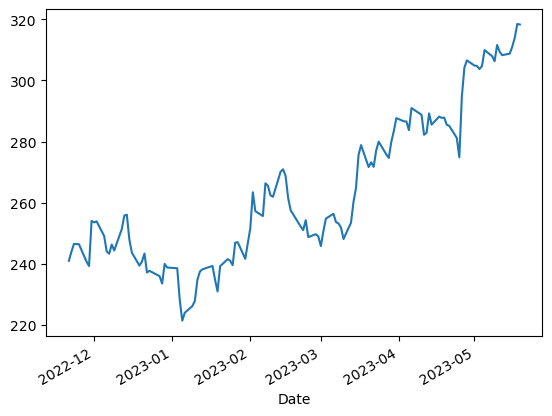

In [13]:
hist['Close'].plot()

<Axes: xlabel='Date'>

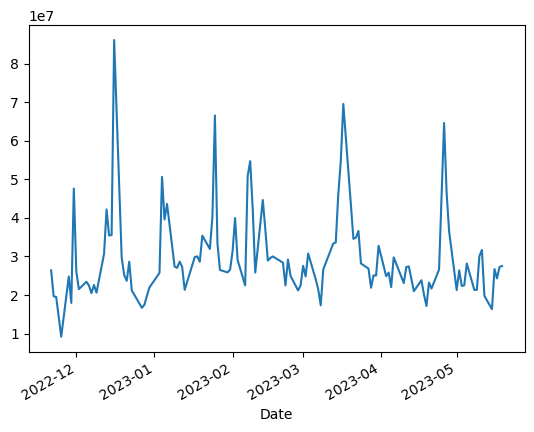

In [14]:
hist['Volume'].plot()

In [136]:
# With this, you can save your data
# hist.to_csv('msft_last_5y.csv')

### show meta information about the history (requires history() to be called first)

In [15]:
# show meta information about the history (requires history() to be called first)
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': Timestamp('1986-03-13 09:30:00-0500', tz='America/New_York'),
 'regularMarketTime': Timestamp('2023-05-19 16:00:04-0400', tz='America/New_York'),
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 318.34,
 'chartPreviousClose': 241.22,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'end': Timestamp('2023-05-19 09:30:00-0400', tz='America/New_York'),
   'start': Timestamp('2023-05-19 04:00:00-0400', tz='America/New_York')},
  'regular': {'end': Timestamp('2023-05-19 16:00:00-0400', tz='America/New_York'),
   'start': Timestamp('2023-05-19 09:30:00-0400', tz='America/New_York')},
  'post': {'end': Timestamp('2023-05-19 20:00:00-0400', tz='America/New_York'),
   'start': Timestamp('2023-05-19 16:00:00-0400', tz='America/New_York')}},
 'dataGranularity': '1d',
 'range': '6mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  

### show actions (dividends, splits, capital gains)


In [16]:
# show actions (dividends, splits, capital gains)
msft.actions

,Dividends,Stock Splits
Date,,
2023-02-15 00:00:00-05:00,0.68,0.0
2023-05-17 00:00:00-04:00,0.68,0.0


In [17]:
msft.actions['Dividends']

Date
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
Name: Dividends, dtype: float64

<Axes: xlabel='Date'>

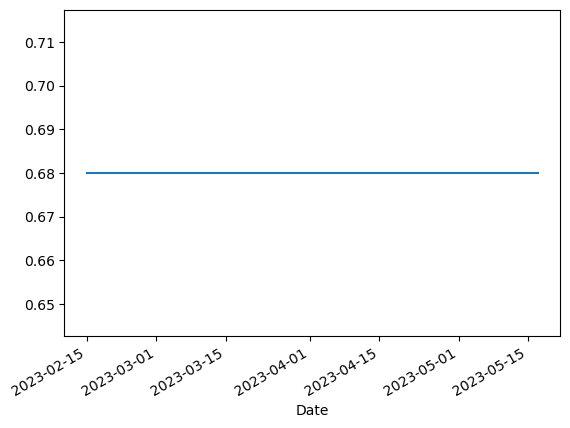

In [18]:
msft.actions['Dividends'].plot()

In [19]:
msft.dividends

Date
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
Name: Dividends, dtype: float64

In [20]:
msft.splits

Series([], Name: Stock Splits, dtype: float64)

In [21]:
msft.capital_gains  # only for mutual funds & etfs

[]

#### Just to give you another example

In [22]:
apple= yf.Ticker("aapl")

In [24]:
# show actions (dividends, splits)
apple.actions

,Dividends,Stock Splits
Date,,
1987-05-11 00:00:00-04:00,0.000536,0.0
1987-06-16 00:00:00-04:00,0.000000,2.0
1987-08-10 00:00:00-04:00,0.000536,0.0
1987-11-17 00:00:00-05:00,0.000714,0.0
1988-02-12 00:00:00-05:00,0.000714,0.0
...,...,...
2022-05-06 00:00:00-04:00,0.230000,0.0
2022-08-05 00:00:00-04:00,0.230000,0.0
2022-11-04 00:00:00-04:00,0.230000,0.0


In [25]:
# show dividends
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
Name: Dividends, Length: 79, dtype: float64

<Axes: xlabel='Date'>

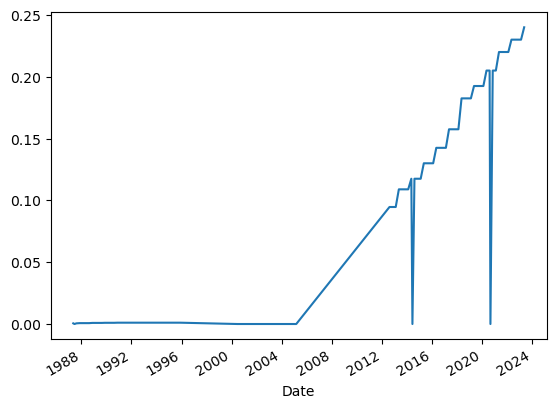

In [26]:
# apple.dividends.plot()

# THey are the same
apple.actions['Dividends'].plot()

In [167]:
# show splits
apple.splits

Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64

<center>Coming back</center>

### show share count


In [28]:
# - yearly summary:
# msft.shares
# This is how we initialise the ticker


# tsla = yf.Ticker("TSLA")
# tsla.shares

In [31]:
# - accurate time-series count:
# msft.get_shares_full(start="2022-01-01", end=None)

tsla.get_shares_full(start="2023-01-01", end=None)

2023-01-04 00:00:00-05:00    3598259968
2023-01-06 00:00:00-05:00    3157750016
2023-02-02 00:00:00-05:00    3164100096
2023-03-16 00:00:00-04:00    3164100096
2023-03-16 00:00:00-04:00    3211770112
2023-03-25 00:00:00-04:00    3194180096
2023-03-25 00:00:00-04:00    3164100096
2023-03-30 00:00:00-04:00    3242540032
2023-04-01 00:00:00-04:00    3362099968
2023-04-01 00:00:00-04:00    3164100096
2023-04-04 00:00:00-04:00    3370909952
2023-04-05 00:00:00-04:00    3164100096
2023-04-06 00:00:00-04:00    3284509952
2023-04-07 00:00:00-04:00    3292679936
2023-04-07 00:00:00-04:00    3164100096
2023-04-08 00:00:00-04:00    3169309952
2023-04-13 00:00:00-04:00    3169309952
2023-04-25 00:00:00-04:00    3169499904
2023-05-03 00:00:00-04:00    3199559936
2023-05-04 00:00:00-04:00    3169499904
2023-05-14 00:00:00-04:00    3180069888
2023-05-16 00:00:00-04:00    3169499904
dtype: int64

<Axes: >

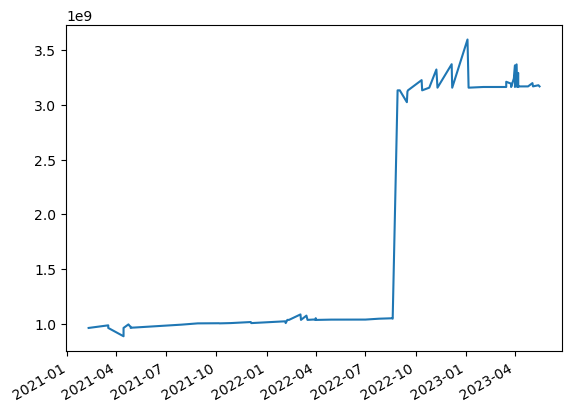

In [40]:
# In the break 
tsla.get_shares_full(start="2021-01-01", end=None).plot()

# Show financials:

### income statement

In [34]:
# - income statement
# msft.income_stmt
# tsla.income_stmt

In [35]:
# msft.quarterly_income_stmt
# tsla.quarterly_income_stmt

### balance sheet

In [37]:
# - balance sheet
# msft.balance_sheet
# tsla.balance_sheet

In [68]:
# msft.quarterly_balance_sheet

### cash flow statement

In [39]:
# - cash flow statement
# msft.cashflow

# tsla.cashflow

In [65]:
# msft.quarterly_cashflow

In [69]:
# see `Ticker.get_income_stmt()` for more options
# msft.get_income_stmt()

# show holders


In [42]:
# show holders
msft.major_holders

,0,1
0,0.05%,% of Shares Held by All Insider
1,73.77%,% of Shares Held by Institutions
2,73.80%,% of Float Held by Institutions
3,6159,Number of Institutions Holding Shares


In [44]:
tsla.major_holders

,0,1
0,13.06%,% of Shares Held by All Insider
1,44.89%,% of Shares Held by Institutions
2,51.63%,% of Float Held by Institutions
3,3307,Number of Institutions Holding Shares


In [46]:
tatamotors = yf.Ticker("TATAMOTORS.NS")
tatamotors.major_holders

,0,1
0,48.13%,% of Shares Held by All Insider
1,22.65%,% of Shares Held by Institutions
2,43.68%,% of Float Held by Institutions
3,173,Number of Institutions Holding Shares


In [61]:
hdfc = yf.Ticker("HDFCBANK.NS")

In [62]:
hdfc.info

{'address1': 'HDFC Bank House',
 'address2': 'Senapati Bapat Marg Lower Parel (W)',
 'city': 'Mumbai',
 'zip': '400013',
 'country': 'India',
 'phone': '91 22 6652 1000',
 'fax': '91 22 2496 0737',
 'website': 'https://www.hdfcbank.com',
 'industry': 'Banks—Regional',
 'industryDisp': 'Banks—Regional',
 'sector': 'Financial Services',
 'longBusinessSummary': 'HDFC Bank Limited provides banking and financial services to individuals and businesses in India, Bahrain, Hong Kong, and Dubai. It operates in Treasury, Retail Banking, Wholesale Banking, Other Banking Business, and Unallocated segments. The company accepts savings, salary, current, rural, public provident fund, pension, and Demat accounts; fixed and recurring deposits; and safe deposit lockers, as well as offshore accounts and deposits, overdrafts against fixed deposits, and sweep-in facilities. It also provides personal, home, car, two wheeler, business, educational, gold, consumer, and rural loans; loans against properties, se

In [70]:
hdfc.major_holders

,0,1
0,21.45%,% of Shares Held by All Insider
1,36.76%,% of Shares Held by Institutions
2,46.80%,% of Float Held by Institutions
3,341,Number of Institutions Holding Shares


In [72]:
google = yf.Ticker("GOOG")
google.info

{'address1': '1600 Amphitheatre Parkway',
 'city': 'Mountain View',
 'state': 'CA',
 'zip': '94043',
 'country': 'United States',
 'phone': '650 253 0000',
 'website': 'https://www.abc.xyz',
 'industry': 'Internet Content & Information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'longBusinessSummary': 'Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in the provision of YouTube n

### show institutional_holders

In [65]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",649516597,2023-03-30,0.0874,206767111110
1,Blackrock Inc.,537573096,2023-03-30,0.0723,171131017411
2,State Street Corporation,292106885,2023-03-30,0.0393,92989304701
3,"FMR, LLC",200523373,2023-03-30,0.0270,63834609826
4,Price (T.Rowe) Associates Inc,166035734,2023-03-30,0.0223,52855814953
5,"Geode Capital Management, LLC",144365760,2023-03-30,0.0194,45957395509
6,Morgan Stanley,120316895,2023-03-30,0.0162,38301679913
7,JP Morgan Chase & Company,91114331,2023-03-30,0.0123,29005335796
8,Capital World Investors,87608980,2023-03-30,0.0118,27889442372
9,Norges Bank Investment Management,86316926,2022-12-30,0.0116,27478129906


In [73]:
tsla.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",220622525,2023-03-30,0.0696,39742941518
1,Blackrock Inc.,178662226,2023-03-30,0.0564,32184213282
2,State Street Corporation,99683820,2023-03-30,0.0315,17957043273
3,"Geode Capital Management, LLC",50047967,2023-03-30,0.0158,9015640744
4,Capital World Investors,43760201,2023-03-30,0.0138,7882962581
5,"FMR, LLC",33326389,2023-03-30,0.0105,6003415694
6,Norges Bank Investment Management,28085245,2022-12-30,0.0089,5059276017
7,JP Morgan Chase & Company,27963317,2023-03-30,0.0088,5037311907
8,Northern Trust Corporation,27057308,2023-03-30,0.0085,4874103446
9,Price (T.Rowe) Associates Inc,26224189,2023-03-30,0.0083,4724025390


In [74]:
google.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",419159171,2023-03-30,0.0714,51661367825
1,Blackrock Inc.,365927668,2023-03-30,0.0623,45100585081
2,State Street Corporation,192048227,2023-03-30,0.0327,23669943977
3,Price (T.Rowe) Associates Inc,121631227,2023-03-30,0.0207,14991048727
4,"FMR, LLC",105554086,2023-03-30,0.0180,13009541099
5,"Geode Capital Management, LLC",97334986,2023-03-30,0.0166,11996537024
6,Capital International Investors,85665968,2023-03-30,0.0146,10558330556
7,JP Morgan Chase & Company,69047002,2023-03-30,0.0118,8510042996
8,Morgan Stanley,69068696,2023-03-30,0.0118,8512716782
9,Northern Trust Corporation,59863249,2023-03-30,0.0102,7378145439


In [69]:
hdfc.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Legato Capital Management LLC,33709,2022-06-30,0.0,55515352


### show mutualfund_holders

In [75]:
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,226594602,2022-12-30,0.0304,72134124770
1,Vanguard 500 Index Fund,172326589,2022-12-30,0.0232,54858445711
2,Fidelity 500 Index Fund,81720092,2023-02-27,0.0110,26014773788
3,SPDR S&P 500 ETF Trust,80591530,2023-03-30,0.0108,25655507365
4,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",75130340,2023-03-30,0.0101,23916992160
5,iShares Core S&P 500 ETF,66532494,2023-02-27,0.0089,21179953896
6,Vanguard Growth Index Fund,62920006,2022-12-30,0.0085,20029954479
7,Vanguard Institutional Index Fund-Institutiona...,52237514,2022-12-30,0.0070,16629290015
8,Growth Fund Of America Inc,41256784,2023-03-30,0.0055,13133684467
9,Vanguard Information Technology Index Fund,34018479,2022-11-29,0.0046,10829442480


In [76]:
tsla.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,81593175,2022-12-30,0.0257,14698194494
1,Vanguard 500 Index Fund,62048685,2022-12-30,0.0196,11177450078
2,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",32068446,2023-03-30,0.0101,5776809842
3,Fidelity 500 Index Fund,29424483,2023-02-27,0.0093,5300526349
4,SPDR S&P 500 ETF Trust,29118108,2023-03-30,0.0092,5245335957
5,Growth Fund Of America Inc,24580126,2023-03-30,0.0078,4427863882
6,iShares Core S&P 500 ETF,23955982,2023-02-27,0.0076,4315430582
7,Vanguard Growth Index Fund,22655222,2022-12-30,0.0071,4081111677
8,Vanguard Institutional Index Fund-Institutiona...,18808776,2022-12-30,0.0059,3388212897
9,Baron Partners Fund,12150000,2022-12-30,0.0038,2188700992


In [78]:
google.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,157137371,2022-12-30,0.0267,19367180975
1,Vanguard 500 Index Fund,122409869,2022-12-30,0.0208,15087016354
2,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",60486521,2023-03-30,0.0103,7454963713
3,Fidelity 500 Index Fund,58044693,2023-02-27,0.0098,7154008412
4,SPDR S&P 500 ETF Trust,56213704,2023-03-30,0.0095,6928339018
5,iShares Core S&P 500 ETF,47257243,2023-02-27,0.0080,5824455199
6,Vanguard Growth Index Fund,43665499,2022-12-30,0.0074,5381772751
7,Price (T.Rowe) Blue Chip Growth Fund Inc.,38565924,2022-12-30,0.0065,4753250133
8,Vanguard Institutional Index Fund-Institutiona...,37091251,2022-12-30,0.0063,4571496685
9,Growth Fund Of America Inc,36424599,2023-03-30,0.0062,4489331826


In [109]:
adani = yf.Ticker("AdaniENT.NS")

In [110]:
adani.info

{'address1': 'Adani Corporate House',
 'address2': 'Shantigram Near Vaishnodevi Circle S G Highway',
 'city': 'Ahmedabad',
 'zip': '382421',
 'country': 'India',
 'phone': '91 79 2656 5555',
 'fax': '91 79 2555 5500',
 'website': 'https://www.adanienterprises.com',
 'industry': 'Thermal Coal',
 'industryDisp': 'Thermal Coal',
 'sector': 'Energy',
 'longBusinessSummary': "Adani Enterprises Limited, together with its subsidiaries, engages in the coal trading, coal mining, oil and gas exploration, ports, multi-modal logistics, power generation and transmission, gas distribution, and edible oil and agro commodities businesses in India and internationally. The company trades in coal; offers bunkering and integrated coal management services; imports fruits, apple, pear, kiwi, oranges, grapes, and other fruits; and markets its apple under the FARM-PIK brand. It is also involved in the mining, processing, acquisition, exploration, and development of various coal properties, including Parsa Eas

In [111]:
adani.mutualfund_holders

In [112]:
adani.institutional_holders

### show earnings

In [ ]:
# show earnings
# msft.earnings

In [ ]:
# tsla.earnings

In [114]:
# adani.earnings

In [115]:
# msft.quarterly_earnings

In [75]:
# show sustainability
# msft.sustainability

### show analysts recommendations


In [116]:
# show analysts recommendations
msft.recommendations

KeyboardInterrupt: 

In [ ]:
msft.recommendations_summary

In [74]:
# show analysts other work
# msft.analyst_price_target

In [117]:
msft.revenue_forecasts

KeyboardInterrupt: 

In [36]:
msft.earnings_forecasts

In [37]:
msft.earnings_trend

In [38]:
# show next event (earnings, etc)
msft.calendar

In [119]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-04-23 06:00:00-04:00,NaN,NaN,NaN
2024-01-22 16:00:00-05:00,NaN,NaN,NaN
2024-01-22 05:00:00-05:00,NaN,NaN,NaN
2023-10-23 06:00:00-04:00,NaN,NaN,NaN
2023-07-24 06:00:00-04:00,2.56,NaN,NaN
2023-04-25 12:00:00-04:00,2.23,2.45,0.0982
2023-01-24 11:00:00-05:00,2.29,2.32,0.0109
2022-10-25 12:00:00-04:00,2.30,2.35,0.0205
2022-07-26 12:00:00-04:00,2.29,2.23,-0.0274


In [120]:
tsla.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-04-17 06:00:00-04:00,NaN,NaN,NaN
2024-01-23 16:00:00-05:00,NaN,NaN,NaN
2024-01-23 05:00:00-05:00,NaN,NaN,NaN
2023-10-17 16:00:00-04:00,NaN,NaN,NaN
2023-07-18 16:00:00-04:00,0.78,NaN,NaN
2023-04-19 12:00:00-04:00,0.85,0.85,-0.0004
2023-01-25 11:00:00-05:00,1.13,1.19,0.0555
2022-10-19 12:00:00-04:00,0.99,1.05,0.0570
2022-07-20 12:00:00-04:00,0.60,0.76,0.2511


In [121]:
adani.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-05-02 16:00:00+05:30,NaN,NaN,NaN
2024-02-12 16:00:00+05:30,NaN,NaN,NaN
2023-11-01 16:00:00+05:30,NaN,NaN,NaN
2023-08-02 16:00:00+05:30,NaN,NaN,NaN
2023-05-04 11:00:00+05:30,NaN,9.58,NaN
2023-02-14 17:00:00+05:30,NaN,NaN,NaN


In [125]:
marico.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-05-03 16:00:00+05:30,NaN,NaN,NaN
2024-02-01 16:00:00+05:30,NaN,NaN,NaN
2023-11-02 16:00:00+05:30,NaN,NaN,NaN
2023-08-04 16:00:00+05:30,3.17,NaN,NaN
2023-05-05 12:00:00+05:30,2.29,2.34,0.0232
2023-02-03 18:00:00+05:30,2.52,2.53,0.0040
2023-02-03 16:00:00+05:30,2.52,2.53,0.0040


In [123]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

'-'

In [124]:
tsla.isin

'-'

### show news

In [126]:
# show news
msft.news

[{'uuid': 'e6fc2ccc-eab3-36b1-aced-b6e5f3cf90be',
  'title': 'Top 20 Most Popular Consumer Electronics Brands',
  'publisher': 'Insider Monkey',
  'link': 'https://finance.yahoo.com/news/top-20-most-popular-consumer-122351505.html',
  'providerPublishTime': 1684585431,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/QoT4mg5GHvCaHqp0__NcyA--~B/aD01ODc7dz04MTY7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/insidermonkey.com/daa8d5ca53325d9684b977feb018e94f',
     'width': 816,
     'height': 587,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/XQPD5CE1rk_gJOPofYc57A--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/daa8d5ca53325d9684b977feb018e94f',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['GOOGL',
   'NVDA',
   'INTC',
   'MSFT',
   'IBM',
   'HPQ',
   'PHG',
   'DELL']},
 {'uuid': 'b158ab09-6e46-3c19-82a2-bb887cc5e8c

# show options expirations


In [127]:
# show options expirations
msft.options

('2023-05-26',
 '2023-06-02',
 '2023-06-09',
 '2023-06-16',
 '2023-06-23',
 '2023-06-30',
 '2023-07-21',
 '2023-08-18',
 '2023-09-15',
 '2023-10-20',
 '2023-11-17',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

In [128]:
tsla.options

('2023-05-26',
 '2023-06-02',
 '2023-06-09',
 '2023-06-16',
 '2023-06-23',
 '2023-06-30',
 '2023-07-21',
 '2023-08-18',
 '2023-09-15',
 '2023-10-20',
 '2023-11-17',
 '2023-12-15',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2024-09-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

In [131]:
google.options

('2023-05-26',
 '2023-06-02',
 '2023-06-09',
 '2023-06-16',
 '2023-06-23',
 '2023-06-30',
 '2023-07-21',
 '2023-08-18',
 '2023-09-15',
 '2023-10-20',
 '2023-11-17',
 '2023-12-15',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

# Get information about the option

With the help of their expiry date

In [135]:
# get option chain for specific expiration
# opt = msft.option_chain('YYYY-MM-DD')

opt = msft.option_chain('2025-06-20')
# data available via: opt.calls, opt.puts

In [136]:
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT250620C00115000,2023-04-12 17:14:13+00:00,115.0,177.00,197.60,202.50,0.0,0.0,4,31,0.000010,True,REGULAR,USD
1,MSFT250620C00120000,2023-05-09 14:35:09+00:00,120.0,195.79,204.00,208.50,0.0,0.0,2,21,0.551427,True,REGULAR,USD
2,MSFT250620C00125000,2023-05-12 15:55:52+00:00,125.0,190.60,199.50,204.50,0.0,0.0,1,36,0.545567,True,REGULAR,USD
3,MSFT250620C00130000,2023-04-17 16:38:40+00:00,130.0,166.58,190.50,195.00,0.0,0.0,7,13,0.487096,True,REGULAR,USD
4,MSFT250620C00135000,2023-04-24 14:39:04+00:00,135.0,157.89,191.00,196.00,0.0,0.0,1,29,0.532445,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,MSFT250620C00420000,2023-05-10 16:49:49+00:00,420.0,18.00,19.50,24.00,0.0,0.0,10,127,0.295265,False,REGULAR,USD
62,MSFT250620C00430000,2023-05-12 19:55:35+00:00,430.0,15.00,17.00,22.00,0.0,0.0,10,12,0.294448,False,REGULAR,USD
63,MSFT250620C00440000,2023-05-18 14:31:44+00:00,440.0,18.00,16.25,19.70,0.0,0.0,4,60,0.290779,False,REGULAR,USD
64,MSFT250620C00450000,2023-05-05 18:17:59+00:00,450.0,14.55,14.50,16.55,0.0,0.0,4,2,0.280281,False,REGULAR,USD


In [137]:
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT250620P00115000,2023-05-16 14:00:06+00:00,115.0,1.54,1.00,1.80,0.00,0.000000,2.0,1938,0.404913,False,REGULAR,USD
1,MSFT250620P00120000,2023-05-18 14:24:05+00:00,120.0,1.60,0.82,2.00,0.00,0.000000,101.0,741,0.397467,False,REGULAR,USD
2,MSFT250620P00125000,2023-05-19 14:36:30+00:00,125.0,1.59,0.30,2.21,-0.32,-16.753923,4.0,613,0.390021,False,REGULAR,USD
3,MSFT250620P00130000,2023-05-18 15:03:09+00:00,130.0,1.91,0.00,2.53,0.00,0.000000,2.0,37,0.385870,False,REGULAR,USD
4,MSFT250620P00135000,2023-05-16 14:00:06+00:00,135.0,2.68,1.47,3.20,0.00,0.000000,1.0,47,0.390936,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,MSFT250620P00410000,2023-02-22 17:29:06+00:00,410.0,157.74,127.50,132.00,0.00,0.000000,2.0,0,0.376952,True,REGULAR,USD
57,MSFT250620P00420000,2023-05-02 16:55:01+00:00,420.0,115.60,100.05,105.00,0.00,0.000000,2.0,1,0.146172,True,REGULAR,USD
58,MSFT250620P00425000,2023-05-16 14:47:52+00:00,425.0,113.70,104.50,109.00,0.00,0.000000,NaN,10,0.138192,True,REGULAR,USD
59,MSFT250620P00430000,2023-04-26 14:05:15+00:00,430.0,136.00,109.00,114.00,0.00,0.000000,NaN,1,0.142282,True,REGULAR,USD


In [138]:
# get option chain for specific expiration
# opt = msft.option_chain('YYYY-MM-DD')

opt = tsla.option_chain('2025-06-20')
# data available via: opt.calls, opt.puts

In [139]:
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA250620C00005000,2023-05-18 15:54:49+00:00,5.0,171.20,171.00,181.00,0.000000,0.000000,3,284,1.497073,True,REGULAR,USD
1,TSLA250620C00010000,2023-04-17 13:38:11+00:00,10.0,178.10,157.35,160.80,0.000000,0.000000,1,6,0.000010,True,REGULAR,USD
2,TSLA250620C00015000,2023-04-24 17:17:22+00:00,15.0,147.82,163.80,170.10,0.000000,0.000000,1,82,1.121586,True,REGULAR,USD
3,TSLA250620C00020000,2023-05-12 13:45:04+00:00,20.0,161.00,159.45,165.75,0.000000,0.000000,10,114,1.050786,True,REGULAR,USD
4,TSLA250620C00025000,2023-05-02 14:34:35+00:00,25.0,142.03,155.05,161.45,0.000000,0.000000,2,24,0.992432,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,TSLA250620C00380000,2023-05-19 19:30:59+00:00,380.0,15.50,14.85,16.45,0.810000,5.513959,6,991,0.517125,False,REGULAR,USD
62,TSLA250620C00390000,2023-05-19 19:01:16+00:00,390.0,14.50,13.85,15.60,0.950000,7.011069,11,2604,0.515920,False,REGULAR,USD
63,TSLA250620C00400000,2023-05-19 19:46:05+00:00,400.0,13.45,13.45,14.80,0.410000,3.144171,51,2142,0.518010,False,REGULAR,USD
64,TSLA250620C00410000,2023-05-19 16:19:53+00:00,410.0,13.15,12.40,14.05,0.799999,6.477727,8,1283,0.515843,False,REGULAR,USD


In [141]:
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA250620P00005000,2023-05-19 18:50:43+00:00,5.0,0.05,0.04,0.05,-0.020000,-28.571426,2,2945,0.945313,False,REGULAR,USD
1,TSLA250620P00010000,2023-05-16 15:43:35+00:00,10.0,0.16,0.00,0.30,0.000000,0.000000,1,93,0.857423,False,REGULAR,USD
2,TSLA250620P00015000,2023-05-17 13:30:36+00:00,15.0,0.35,0.05,0.56,0.000000,0.000000,5,5894,0.803225,False,REGULAR,USD
3,TSLA250620P00020000,2023-05-19 19:58:18+00:00,20.0,0.57,0.53,0.67,0.000000,0.000000,5,782,0.784182,False,REGULAR,USD
4,TSLA250620P00025000,2023-05-18 14:32:04+00:00,25.0,0.82,0.82,0.92,-0.040000,-4.651166,5,384,0.748538,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,TSLA250620P00380000,2023-05-12 13:33:29+00:00,380.0,200.39,197.80,204.80,-3.740006,-1.832168,1,0,0.369269,True,REGULAR,USD
62,TSLA250620P00390000,2023-05-19 14:25:08+00:00,390.0,209.29,205.85,214.30,-5.660004,-2.633172,7,5,0.368476,True,REGULAR,USD
63,TSLA250620P00400000,2023-05-18 15:48:53+00:00,400.0,224.90,215.80,224.15,0.000000,0.000000,5,0,0.373755,True,REGULAR,USD
64,TSLA250620P00410000,2023-05-10 14:36:48+00:00,410.0,236.77,227.60,233.85,0.000000,0.000000,50,0,0.375556,True,REGULAR,USD


# Let's recap

In [153]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'fax': '425 706 7329',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, Syst

# Multiple tickers
To initialize multiple ```Ticker``` objects, use

In [213]:
import yfinance as yf

# This is what we already know
# google = yf.Ticker("GOOG")


tickers = yf.Tickers('msft aapl goog')

In [214]:
tickers

yfinance.Tickers object <MSFT,AAPL,GOOG>

In [215]:
# This will give you a dictionary, that will consist of the tickers we want. 
tickers.tickers

{'MSFT': yfinance.Ticker object <MSFT>,
 'AAPL': yfinance.Ticker object <AAPL>,
 'GOOG': yfinance.Ticker object <GOOG>}

In [162]:
tickers.tickers['MSFT']

yfinance.Ticker object <MSFT>

In [163]:
tickers.tickers['AAPL']

yfinance.Ticker object <AAPL>

In [164]:
tickers.tickers['GOOG']

yfinance.Ticker object <GOOG>

In [166]:
# access each ticker using (example)
tickers.tickers['MSFT'].info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'fax': '425 706 7329',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, Syst

In [167]:
# access each ticker using (example)
tickers.tickers['AAPL'].info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [169]:
# access each ticker using (example)
tickers.tickers['GOOG'].info

{'address1': '1600 Amphitheatre Parkway',
 'city': 'Mountain View',
 'state': 'CA',
 'zip': '94043',
 'country': 'United States',
 'phone': '650 253 0000',
 'website': 'https://www.abc.xyz',
 'industry': 'Internet Content & Information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'longBusinessSummary': 'Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in the provision of YouTube n

In [170]:
tickers.tickers['AAPL'].history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-20 00:00:00-04:00,165.860576,167.638116,165.331309,166.419800,52456400,0.00,0.0
2023-04-21 00:00:00-04:00,164.822026,166.220086,164.262802,164.792068,58337300,0.00,0.0
2023-04-24 00:00:00-04:00,164.772093,165.371270,163.663625,165.101639,41949600,0.00,0.0
2023-04-25 00:00:00-04:00,164.961829,166.080278,163.503839,163.543793,48714100,0.00,0.0
2023-04-26 00:00:00-04:00,162.834768,165.051703,162.575133,163.533798,45498800,0.00,0.0
2023-04-27 00:00:00-04:00,164.961830,168.327170,164.961830,168.177383,64902300,0.00,0.0
2023-04-28 00:00:00-04:00,168.257274,169.615396,167.648116,169.445618,55209200,0.00,0.0
2023-05-01 00:00:00-04:00,169.046174,170.214556,168.407059,169.355743,52472900,0.00,0.0
2023-05-02 00:00:00-04:00,169.855052,170.114703,167.308571,168.307190,48425700,0.00,0.0


In [171]:
tickers.tickers['AAPL'].institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1309785362,2023-03-30,0.0833,229422008804
1,Blackrock Inc.,1035008939,2023-03-30,0.0658,181292169545
2,"Berkshire Hathaway, Inc",915560382,2023-03-30,0.0582,160369559864
3,State Street Corporation,576281774,2023-03-30,0.0366,100941517644
4,"FMR, LLC",311437576,2023-03-30,0.0198,54551406952
5,"Geode Capital Management, LLC",285171112,2023-03-30,0.0181,49950573022
6,Price (T.Rowe) Associates Inc,234017381,2023-03-30,0.0149,40990485312
7,Morgan Stanley,200615893,2023-03-30,0.0128,35139880552
8,Northern Trust Corporation,173130542,2023-03-30,0.0110,30325546370
9,Norges Bank Investment Management,167374278,2022-12-30,0.0106,29317279147


In [172]:
tickers.tickers['GOOG'].actions

,Dividends,Stock Splits
Date,,
2014-03-27 00:00:00-04:00,0.0,2.002000
2015-04-27 00:00:00-04:00,0.0,1.002746
2022-07-18 00:00:00-04:00,0.0,20.000000


# To download
To download price history into one table:

In [174]:
import yfinance as yf

In [177]:
# It will give you daily data by default
data = yf.download('marico.NS',"2023-01-01","2023-05-01")

[*********************100%***********************]  1 of 1 completed


In [178]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,509.850006,513.000000,501.000000,506.250000,501.702393,651385
2023-01-03,506.250000,513.400024,504.299988,510.600006,506.013306,490270
2023-01-04,511.000000,514.700012,505.000000,506.149994,501.603271,790246
2023-01-05,506.149994,524.900024,504.850006,515.500000,510.869293,2901670
2023-01-06,515.500000,517.400024,507.649994,513.049988,508.441284,896307
...,...,...,...,...,...,...
2023-04-24,475.750000,477.250000,470.450012,474.950012,474.950012,2043813
2023-04-25,474.950012,492.450012,474.500000,489.750000,489.750000,3869120
2023-04-26,489.750000,499.500000,489.750000,496.950012,496.950012,2098348


In [182]:
type(data)

pandas.core.frame.DataFrame

# How to save to disk

In [183]:
# Save to an csv file
# data.to_csv('marico_historic_stock_price.csv')

In [184]:
# Save to an excel file
# data.to_excel('marico_historic_stock_price_excel.xlsx')

# How to save, multiple tickers

In [185]:
# By default, it will give you daily data
data = yf.download("ITC.NS BRITANNIA.NS", start="2017-01-01", end="2023-04-30")

[*********************100%***********************]  2 of 2 completed


In [187]:
# This output has multilevel index for colomns
data

Adj Close                    Close                     High  \
           BRITANNIA.NS      ITC.NS BRITANNIA.NS      ITC.NS BRITANNIA.NS   
Date                                                                        
2017-01-02  1272.969604  194.227478  1443.224976  240.949997  1450.550049   
2017-01-03  1266.707153  196.162094  1436.125000  243.350006  1445.000000   
2017-01-04  1257.953003  197.854904  1426.199951  245.449997  1445.000000   
2017-01-05  1263.862793  198.902786  1432.900024  246.750000  1437.500000   
2017-01-06  1276.718262  195.638168  1447.474976  242.699997  1457.500000   
...                 ...         ...          ...         ...          ...   
2023-04-24  4311.000000  408.700012  4311.000000  408.700012  4339.450195   
2023-04-25  4402.549805  411.549988  4402.549805  411.549988  4411.000000   
2023-04-26  4405.000000  412.250000  4405.000000  412.250000  4422.850098   
2023-04-27  4415.850098  416.000000  4415.850098  416.000000  4429.350098   
2023-04-28  4553.549805  425.549988  4553.549805  425.549988  4564.850098   

                                Low                     Open              \
                ITC.NS BRITANNIA.NS      ITC.NS BRITANNIA.NS      ITC.NS   
Date                                                                       
2017-01-02  242.250000  1432.574951  238.600006  1450.550049  242.000000   
2017-01-03  245.699997  1425.599976  239.250000  1443.500000  240.899994   
2017-01-04  247.000000  1415.224976  240.100006  1445.000000  242.850006   
2017-01-05  247.850006  1426.300049  244.100006  1431.000000  244.500000   
2017-01-06  249.000000  1422.900024  242.199997  1432.500000  247.000000   
...                ...          ...         ...          ...         ...   
2023-04-24  410.000000  4297.000000  404.200012  4327.799805  410.000000   
2023-04-25  413.549988  4311.000000  407.399994  4313.000000  408.700012   
2023-04-26  413.000000  4370.799805  409.049988  4400.000000  412.000000   
2023-04-27  417.399994  4397.000000  411.000000  4407.000000  412.200012   
2023-04-28  428.250000  4408.649902  413.700012  4415.950195  418.000000   

                 Volume            
           BRITANNIA.NS    ITC.NS  
Date                               
2017-01-02       104490   4887504  
2017-01-03       255186   7508925  
2017-01-04       273358   9310104  
2017-01-05       232668   9178665  
2017-01-06       795436   8093288  
...                 ...       ...  
2023-04-24       182843   5981760  
2023-04-25       353719   8840188  
2023-04-26       306037   7620723  
2023-04-27       179769  12614263  
2023-04-28       482939  12718721  

[1563 rows x 12 columns]

In [190]:
data['High']

,BRITANNIA.NS,ITC.NS
Date,,
2017-01-02,1450.550049,242.250000
2017-01-03,1445.000000,245.699997
2017-01-04,1445.000000,247.000000
2017-01-05,1437.500000,247.850006
2017-01-06,1457.500000,249.000000
...,...,...
2023-04-24,4339.450195,410.000000
2023-04-25,4411.000000,413.549988
2023-04-26,4422.850098,413.000000


In [191]:
data.to_excel('itc_britania_historical_stock_price.xlsx')

# What if we want to customize it

```yf.download()``` and ()```Ticker.history()()``` have many options for configuring fetching and processing, e.g.:

In [206]:
#  Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

data_2 = yf.download(tickers = "SPY AAPL",  # list of tickers
#                        start="2017-01-01", # This is the start
#                       end="2023-04-30",   # This is the end 
                        period = "1mo",         # time period, if you are using period, no need to put start and end
                        interval = "15m",       # trading interval
                        prepost = False,       # download pre/post market hours data?
                        repair = True)         # repair obvious price errors e.g. 100x?

[*********************100%***********************]  2 of 2 completed


In [209]:
data_2

Adj Close                   Close              \
                           AAPL         SPY        AAPL         SPY   
Datetime                                                              
2023-04-20 09:30:00  167.146103  412.040100  167.146103  412.040100   
2023-04-20 09:45:00  166.815002  411.660004  166.815002  411.660004   
2023-04-20 10:00:00  167.164993  412.390015  167.164993  412.390015   
2023-04-20 10:15:00  167.039993  412.239990  167.039993  412.239990   
2023-04-20 10:30:00  166.750000  412.500000  166.750000  412.500000   
...                         ...         ...         ...         ...   
2023-05-19 14:45:00  175.529999  418.670013  175.529999  418.670013   
2023-05-19 15:00:00  175.600006  418.700104  175.600006  418.700104   
2023-05-19 15:15:00  175.130005  418.182892  175.130005  418.182892   
2023-05-19 15:30:00  175.169800  418.679993  175.169800  418.679993   
2023-05-19 15:45:00  175.190002  418.609985  175.190002  418.609985   

                           High                     Low              \
                           AAPL         SPY        AAPL         SPY   
Datetime                                                              
2023-04-20 09:30:00  167.189896  412.059998  165.889999  411.079987   
2023-04-20 09:45:00  167.330002  412.320007  166.759995  411.440002   
2023-04-20 10:00:00  167.399994  412.420013  166.679993  411.359985   
2023-04-20 10:15:00  167.309998  412.510010  166.980392  412.100006   
2023-04-20 10:30:00  167.270004  412.730011  166.660004  412.179993   
...                         ...         ...         ...         ...   
2023-05-19 14:45:00  175.600006  418.709991  175.169998  417.820007   
2023-05-19 15:00:00  175.600006  418.720001  175.259903  418.195007   
2023-05-19 15:15:00  175.595001  418.720001  175.121094  418.144989   
2023-05-19 15:30:00  175.255005  418.720001  175.070007  417.989990   
2023-05-19 15:45:00  175.360001  418.989990  174.940002  418.350006   

                           Open               Volume            
                           AAPL         SPY     AAPL       SPY  
Datetime                                                        
2023-04-20 09:30:00  166.089996  411.209991  5378916   5630619  
2023-04-20 09:45:00  167.147995  412.049988  2526098   3774393  
2023-04-20 10:00:00  166.809998  411.660004  2332571   3550510  
2023-04-20 10:15:00  167.160004  412.369995  1710794   1971865  
2023-04-20 10:30:00  167.039993  412.230011  1672023   2164690  
...                         ...         ...      ...       ...  
2023-05-19 14:45:00  175.379898  418.214996  1131586   2936969  
2023-05-19 15:00:00  175.528900  418.670013   972079   1889422  
2023-05-19 15:15:00  175.589996  418.709991  1239930   2218825  
2023-05-19 15:30:00  175.139999  418.184998  1539189   2822246  
2023-05-19 15:45:00  175.169998  418.690002  3911408  10478332  

[572 rows x 12 columns]

<Axes: xlabel='Datetime'>

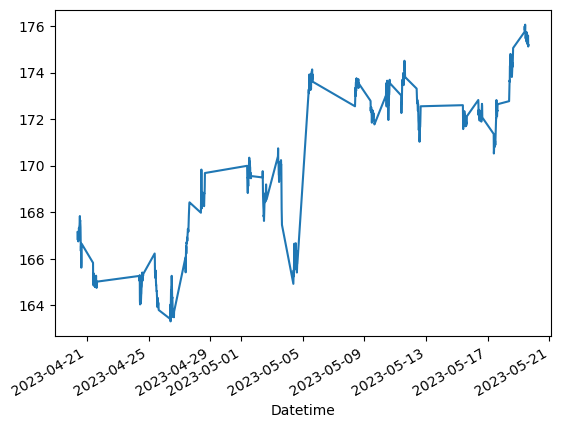

In [212]:
data_2['Close']['AAPL'].plot()

In [208]:
data_2.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           )

In [96]:
# Import the yfinance. If you get module not found error the run !pip install yfinance from your Jupyter notebook
import yfinance as yf

# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

[*********************100%***********************]  1 of 1 completed


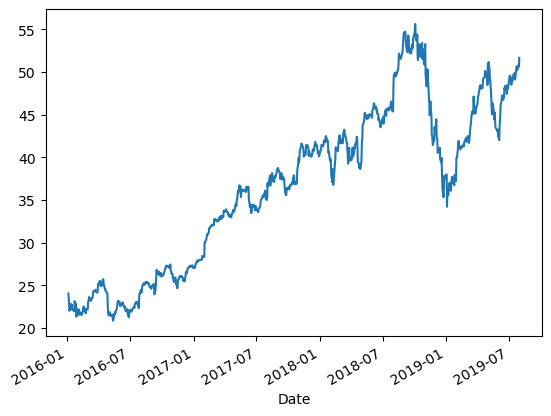

In [97]:
# Import the plotting library
import matplotlib.pyplot as plt

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

# Now, let's talk about creating dataframe

In [216]:
# I will load my dataframe
df = pd.read_excel('my_stocks_pick.xlsx', sheet_name="Sheet1")

In [218]:
df

,Tickers
0,msft
1,aapl
2,goog
3,meta
4,nflx


In [220]:
df['Tickers']

0    msft
1    aapl
2    goog
3    meta
4    nflx
Name: Tickers, dtype: object

# Let's loop over this

In [244]:
df['Tickers']

0    msft
1    aapl
2    goog
3    meta
4    nflx
Name: Tickers, dtype: object

In [245]:
for i in df['Tickers']:
    print(i)

msft
aapl
goog
meta
nflx


In [233]:
# Experimenting
for i in df['Tickers']:
    
    # Initialising
    ticker = yf.Ticker(i)
    # let's gather some info
    tickerinfo = ticker.info

    # Printing the full name of the company
    print(tickerinfo['longName'])

    # Printing the number of full time employees within the company
    print(tickerinfo['fullTimeEmployees'])

Microsoft Corporation
221000
Apple Inc.
164000
Alphabet Inc.
190711
Meta Platforms, Inc.
77114
Netflix, Inc.
12800


In [272]:
# Experimenting

numemployee = []
fullname = []
ceoname = []
ceototalpay = []

for i in df['Tickers']:
    
    # Initialising
    ticker = yf.Ticker(i)
    # let's gather some info
    tickerinfo = ticker.info

    # Appending the full name of the company
    fullname.append(tickerinfo['longName'])

    # Appending the number of full time employees within the company
    numemployee.append(tickerinfo['fullTimeEmployees'])
    
    # Appending the number of full time employees within the company
    ceoname.append(tickerinfo['companyOfficers'][0]['name'])
    
    # Appending the number of full time employees within the company
    ceototalpay.append(tickerinfo['companyOfficers'][0]['totalPay'])

In [275]:
# My number of employees
numemployee

[221000, 164000, 190711, 77114, 12800]

In [276]:
# The full name of my tickers
fullname

['Microsoft Corporation',
 'Apple Inc.',
 'Alphabet Inc.',
 'Meta Platforms, Inc.',
 'Netflix, Inc.']

In [277]:
ceoname

['Mr. Satya  Nadella',
 'Mr. Timothy D. Cook',
 'Mr. Sundar  Pichai',
 'Mr. Mark Elliot Zuckerberg',
 'Mr. Wilmot Reed Hastings Jr.']

In [278]:
ceototalpay

[12676750, 16425933, 7947461, 27110418, 1665055]

In [279]:
df

,Tickers,FullName,NumEmployee
0,msft,Microsoft Corporation,221000
1,aapl,Apple Inc.,164000
2,goog,Alphabet Inc.,190711
3,meta,"Meta Platforms, Inc.",77114
4,nflx,"Netflix, Inc.",12800


In [280]:
# I will create a column called fullname and fill it with the values in the list fullname
df['FullName'] = fullname

In [281]:
df

,Tickers,FullName,NumEmployee
0,msft,Microsoft Corporation,221000
1,aapl,Apple Inc.,164000
2,goog,Alphabet Inc.,190711
3,meta,"Meta Platforms, Inc.",77114
4,nflx,"Netflix, Inc.",12800


In [282]:
# I will create a column called NumEmployee and fill it with the values in the list numemployee
df['NumEmployee'] = numemployee

In [283]:
df

,Tickers,FullName,NumEmployee
0,msft,Microsoft Corporation,221000
1,aapl,Apple Inc.,164000
2,goog,Alphabet Inc.,190711
3,meta,"Meta Platforms, Inc.",77114
4,nflx,"Netflix, Inc.",12800


In [284]:
# I will create a column called Ceo Name and fill it with the values in the list ceoname
df['Ceo Name'] = ceoname

In [285]:
df

,Tickers,FullName,NumEmployee,Ceo Name
0,msft,Microsoft Corporation,221000,Mr. Satya Nadella
1,aapl,Apple Inc.,164000,Mr. Timothy D. Cook
2,goog,Alphabet Inc.,190711,Mr. Sundar Pichai
3,meta,"Meta Platforms, Inc.",77114,Mr. Mark Elliot Zuckerberg
4,nflx,"Netflix, Inc.",12800,Mr. Wilmot Reed Hastings Jr.


In [286]:
# I will create a column called CEO Total Pay and fill it with the values in the list ceototalpay
df['CEO Total Pay'] = ceototalpay

In [287]:
df

,Tickers,FullName,NumEmployee,Ceo Name,CEO Total Pay
0,msft,Microsoft Corporation,221000,Mr. Satya Nadella,12676750
1,aapl,Apple Inc.,164000,Mr. Timothy D. Cook,16425933
2,goog,Alphabet Inc.,190711,Mr. Sundar Pichai,7947461
3,meta,"Meta Platforms, Inc.",77114,Mr. Mark Elliot Zuckerberg,27110418
4,nflx,"Netflix, Inc.",12800,Mr. Wilmot Reed Hastings Jr.,1665055


# Parting Gift

![](https://y.yarn.co/1c646a18-67c5-4795-b05e-6c065fa7f38d_text.gif)

In [131]:
stocks = pd.read_csv('sp_500_stocks.csv')
stocks

,Ticker
0,A
1,AAL
2,AAP
3,AAPL
4,ABBV
...,...
500,YUM
501,ZBH
502,ZBRA
503,ZION


In [132]:
# Remoing some stocks 
stocks = stocks.drop([135, 219, 467, 484, 28])
stocks = stocks.reset_index()
stocks

,index,Ticker
0,0,A
1,1,AAL
2,2,AAP
3,3,AAPL
4,4,ABBV
...,...,...
495,500,YUM
496,501,ZBH
497,502,ZBRA
498,503,ZION


In [40]:
msftinfo.keys()

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'fax', 'website', 'industry', 'industryDisp', 'sector', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpriseValue', 'profitMargins', 'floatSh

# A function that does all the heavy lifting

In [155]:
import numpy as np

msft = yf.Ticker("MSFT")
msftinfo = msft.info
list_of_keys = list(msftinfo.keys())


def get_company_info(x):

    # -------------------------- Initialising the columns we want -------------------------- #
    # Initialising
    msft = yf.Ticker("MSFT")
    msftinfo = msft.info
    list_of_keys = list(msftinfo.keys())

    # -------------------------------------------------------------------------------------- #
    try:
        # Getting the information we want
        ticker = yf.Ticker(x)
        # let's gather some info
        tickerinfo = ticker.info

        # -------------------------------------------------------------------------------------- #

        # Parsing our output

        result = []

        for i in list_of_keys:
            try:
                result.append(tickerinfo[i])
            except:
                result.append(np.nan)

        # -------------------------------------------------------------------------------------- #

        return result
    except:
        a = np.empty(130)
        a[:] = np.nan
        
        return a

In [150]:
df_temp = pd.DataFrame({'Ticker':['A','ABCD']})

In [151]:
df_temp

,Ticker
0,A
1,ABCD


In [152]:
df_temp['Ticker'].apply(get_company_info)

0    [5301 Stevens Creek Boulevard, Santa Clara, CA...
1    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Name: Ticker, dtype: object

In [153]:
stocks = stocks.head(150)

In [156]:
output = stocks['Ticker'].apply(get_company_info)

In [157]:
output

0      [5301 Stevens Creek Boulevard, Santa Clara, CA...
1      [1 Skyview Drive, Fort Worth, TX, 76155, Unite...
2      [4200 Six Forks Road, Raleigh, NC, 27609, Unit...
3      [One Apple Park Way, Cupertino, CA, 95014, Uni...
4      [1 North Waukegan Road, North Chicago, IL, 600...
                             ...                        
145    [2000 16th Street, Denver, CO, 80202, United S...
146    [333 West Sheridan Avenue, Oklahoma City, OK, ...
147    [20408 Bashan Drive, Ashburn, VA, 20147, Unite...
148    [6340 Sequence Drive, San Diego, CA, 92121, Un...
149    [209 Redwood Shores Parkway, Redwood City, CA,...
Name: Ticker, Length: 150, dtype: object

In [158]:
# Making a DataFrame out of our Output
df = pd.DataFrame(output)

In [159]:
df

,Ticker
0,"[5301 Stevens Creek Boulevard, Santa Clara, CA..."
1,"[1 Skyview Drive, Fort Worth, TX, 76155, Unite..."
2,"[4200 Six Forks Road, Raleigh, NC, 27609, Unit..."
3,"[One Apple Park Way, Cupertino, CA, 95014, Uni..."
4,"[1 North Waukegan Road, North Chicago, IL, 600..."
...,...
145,"[2000 16th Street, Denver, CO, 80202, United S..."
146,"[333 West Sheridan Avenue, Oklahoma City, OK, ..."
147,"[20408 Bashan Drive, Ashburn, VA, 20147, Unite..."
148,"[6340 Sequence Drive, San Diego, CA, 92121, Un..."


In [160]:
df_data = pd.DataFrame(df['Ticker'].to_list(), columns=list_of_keys)

In [162]:
df_data

,address1,city,state,zip,country,phone,fax,website,industry,industryDisp,...,grossProfits,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,5301 Stevens Creek Boulevard,Santa Clara,CA,95051,United States,800 227 9770,866 497 1134,https://www.agilent.com,Diagnostics & Research,Diagnostics & Research,...,3.722000e+09,7.551250e+08,1.353000e+09,0.279,0.049,0.54545,0.29134,0.24776,USD,2.5326
1,1 Skyview Drive,Fort Worth,TX,76155,United States,682 278 9000,NaN,https://www.aa.com,Airlines,Airlines,...,1.144300e+10,2.604125e+09,4.321000e+09,NaN,0.370,0.26094,0.12323,0.07937,USD,0.0929
2,4200 Six Forks Road,Raleigh,NC,27609,United States,540 362 4911,NaN,https://www.advanceautoparts.com,Specialty Retail,Specialty Retail,...,4.964672e+09,3.001706e+08,7.222220e+08,0.383,0.032,0.44507,0.09302,0.06758,USD,1.1833
3,One Apple Park Way,Cupertino,CA,95014,United States,408 996 1010,NaN,https://www.apple.com,Consumer Electronics,Consumer Electronics,...,1.707820e+11,8.379662e+10,1.095840e+11,0.000,-0.025,0.43181,0.32145,0.29163,USD,2.8478
4,1 North Waukegan Road,North Chicago,IL,60064-6400,United States,847 932 7900,NaN,https://www.abbvie.com,Drug Manufacturers—General,Drug Manufacturers—General,...,4.152700e+10,2.160288e+10,2.422800e+10,-0.949,-0.097,0.70959,0.52031,0.36979,USD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2000 16th Street,Denver,CO,80202,United States,720 631 2100,NaN,https://www.davita.com,Medical Care Facilities,Medical Care Facilities,...,3.400341e+09,9.499489e+08,1.704932e+09,-0.224,0.020,0.29282,0.17349,0.11025,USD,1.8407
146,333 West Sheridan Avenue,Oklahoma City,OK,73102-5015,United States,405 235 3611,NaN,https://www.devonenergy.com,Oil & Gas E&P,Oil & Gas E&P,...,1.132900e+10,6.448750e+08,8.370000e+09,0.034,-0.163,0.59105,0.57081,0.43959,USD,NaN
147,20408 Bashan Drive,Ashburn,VA,20147,United States,703 245 9600,NaN,https://www.dxc.technology,Information Technology Services,Information Technology Services,...,NaN,4.692500e+08,1.415000e+09,NaN,-0.104,0.22065,0.12758,0.02010,USD,NaN
148,6340 Sequence Drive,San Diego,CA,92121,United States,858 200 0200,NaN,https://www.dexcom.com,Medical Devices,Medical Devices,...,1.883100e+09,4.290625e+08,7.539000e+08,-0.486,0.179,0.64437,0.17912,0.13138,USD,4.4945


In [ ]:
df_data['Ticker'] = 

In [163]:
idx = 0
new_col = stocks['Ticker']  # can be a list, a Series, an array or a scalar   
df_data.insert(loc=idx, column='Ticker', value=new_col)

In [165]:
df_data.to_csv('Final_Output.csv')